In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import convolve
from scipy.fftpack import next_fast_len

30


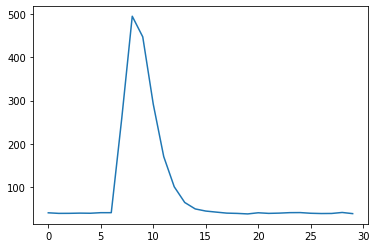

65


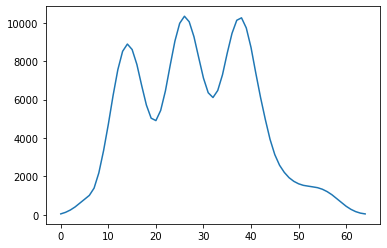

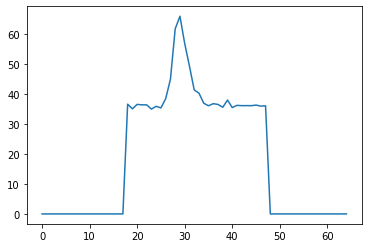

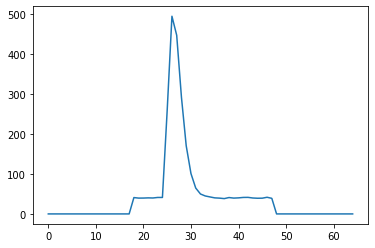

c:\users\lucasdevries\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


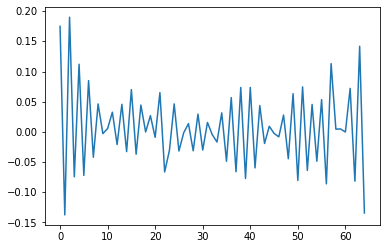

c:\users\lucasdevries\anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


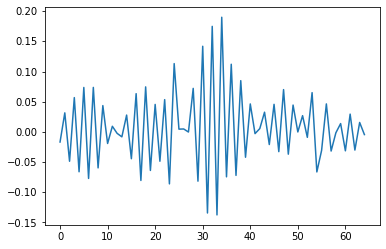

In [73]:


# A, in the description above
A = np.array([40.88909, 39.572624, 39.66895, 40.150585, 39.861603, 41.17807, 41.17807, 259.03726, 494.58847, 447.00302, 291.8205, 170.57712, 100.96492, 64.71393, 49.847485, 44.93482, 42.494537, 40.150585, 39.508408, 38.320374, 40.95331, 39.572624
, 40.150585, 41.24229, 41.402832, 39.829494, 39.219425, 39.37997, 41.659706, 38.994663])
print(len(A))
plt.plot(A)
plt.show()
kernel=np.asarray([1,2,3,4,5,5,5,4,3,2,1,1]*3)
paddedB = convolve(kernel, A, mode='full')
print(len(paddedB))
plt.plot(paddedB)
plt.show()
tac = np.array([36.53651, 34.986446, 36.46889, 36.31988, 36.31408, 34.910664, 35.834126, 35.302002, 38.377743, 44.878765, 61.647404, 65.82341, 56.729576, 49.18667, 41.271477, 40.218956, 36.858242, 36.01578, 36.70881, 36.452496, 35.518425, 37.906708, 35.414345, 36.153347, 36.041813, 36.06485, 36.03627, 36.237434, 35.90031, 35.97077])
# plt.plot(tac)
# plt.show()
# print(tac)
tac_padded = np.zeros(65)
tac_padded[estimatedkernelsize//2: estimatedkernelsize//2+tac.shape[0]]=tac[:]
plt.plot(tac_padded)
plt.show()
estimatedkernelsize=len(kernel)
paddedA=np.zeros(paddedB.shape[0])
paddedA[estimatedkernelsize//2: estimatedkernelsize//2+A.shape[0]]=A[:]
plt.plot(paddedA)
plt.show()

#pad both signal and kernel. Requires the size of the kernel

# Using the deconvolution theorem
f_A = np.fft.fft(paddedA)
f_B = np.fft.fft(tac_padded)
# I know that you should use a regularization here 
r = f_B / f_A

# dk should be equal to kernel
dk = np.fft.ifft(r)
plt.plot(dk)
plt.show()
# shift to get zero abscissa in the middle:
dk=np.fft.fftshift(dk)

plt.plot(dk)
plt.show()

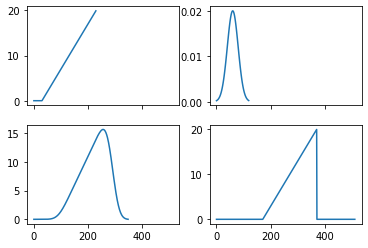

In [51]:
t = np.zeros(30)
t = np.append(t, np.arange(0, 20, 0.1))

sigma = 2
mu = 5.
g = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(np.arange(mu-3*sigma,mu+3*sigma,0.1)-mu)**2/(2*sigma**2))

def pad_signals(s1, s2):
    size = t.size +g.size - 1
    size = int(2 ** np.ceil(np.log2(size)))
    s1 = np.pad(s1, ((size-s1.size)//2, int(np.ceil((size-s1.size)/2))), 'constant', constant_values=(0, 0))
    s2 = np.pad(s2, ((size-s2.size)//2, int(np.ceil((size-s2.size)/2))), 'constant', constant_values=(0, 0))
    return s1, s2

def decon_fourier_ratio(signal, removed_signal):
    signal, removed_signal = pad_signals(signal, removed_signal)
    recovered = np.fft.fftshift(np.fft.ifft(np.fft.fft(signal)/np.fft.fft(removed_signal)))
    return np.real(recovered)

g /= g.sum()  # so the deconvolved signal has the same amplitude
gt = np.convolve(t, g, mode='full')
tr = decon_fourier_ratio(gt, g)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
ax[0,0].plot(np.arange(0,np.fft.irfft(np.fft.rfft(t)).size), np.fft.irfft(np.fft.rfft(t)), label='thickness')
ax[0,1].plot(np.arange(0,np.fft.irfft(np.fft.rfft(g)).size), np.fft.irfft(np.fft.rfft(g)), label='probe shape')
ax[1,0].plot(np.arange(0,gt.size),gt, label='recorded signal')
ax[1,1].plot(np.arange(0,tr.size),tr, label='deconvolved signal')
plt.show()